In [176]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 4]


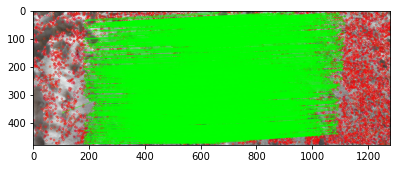

(<matplotlib.image.AxesImage at 0x1b181bc7f70>, None)

In [177]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]
img1 = cv2.imread('./SYS809_projet2021_sequences1/neigeA-06.jpg')
img2 = cv2.imread('./SYS809_projet2021_sequences1/neigeB-06.jpg')
gray_img1 = cv2.imread('./SYS809_projet2021_sequences1/neigeA-06.jpg' , cv2.IMREAD_GRAYSCALE) 
gray_img2 = cv2.imread('./SYS809_projet2021_sequences1/neigeB-06.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img1)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#Le champ .pt des object KeyPoint contiennent la position du point-cle

img1=cv2.drawKeypoints(img1,kp1,None)
img2=cv2.drawKeypoints(img2,kp2,None)
#cv2.imwrite('./images_et_fichier/sift_keypoints1.jpg',img1)
#cv2.imwrite('./images_et_fichier/sift_keypoints2.jpg',img2)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

#knnMatch retourne les 2 plus proche voisin pour chaque membre de des1
matches = flann.knnMatch(des1,des2,k=2)
#Les objects DMatch contiennent index de du point-cle de ds1 match dans le champ queryIdx
#et l'index du point-cle appartenant a des2 dans le champ trainIdx

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]


# ratio test as per Lowe's paper,
good = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

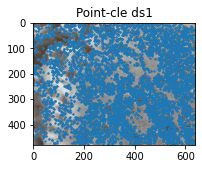

In [178]:
img1_pts = np.float32([ kp.pt for kp in kp1 ])
plt.subplot(1, 2, 1)
x,y = zip(*img1_pts)
plt.imshow(img1)
plt.scatter(x,y, s=[2])
plt.title("Point-cle ds1")
plt.xlim([0,gray_img1.shape[1]])
plt.ylim([0,gray_img1.shape[0]])
plt.gca().invert_yaxis()



In [179]:
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
tf.__version__
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11862371126529057408
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4162256896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11161734314721828142
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:2b:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [180]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import os
import cv2
import numpy as np
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
   
def load_img(img_path,img_shape):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    img = image.img_to_array(img) 
    img = np.expand_dims(img, axis=0)

    img =  preprocess_input(img)


    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return img

In [181]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16


model = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


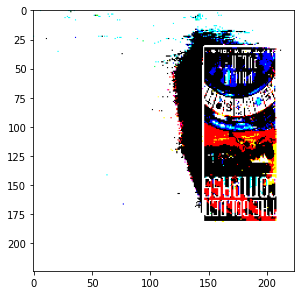

In [182]:
from tensorflow.keras import backend as K

get_layer_output = K.function([model.input], [model.layers[-2].output])

data_path='./SYS809_projet2021_sequences1/livre1.JPG'
img_shape=[224,224]
img = load_img(data_path,img_shape)

plt.imshow(img[0])




In [183]:
#print(model.summary())
print(img.shape)

(1, 224, 224, 3)


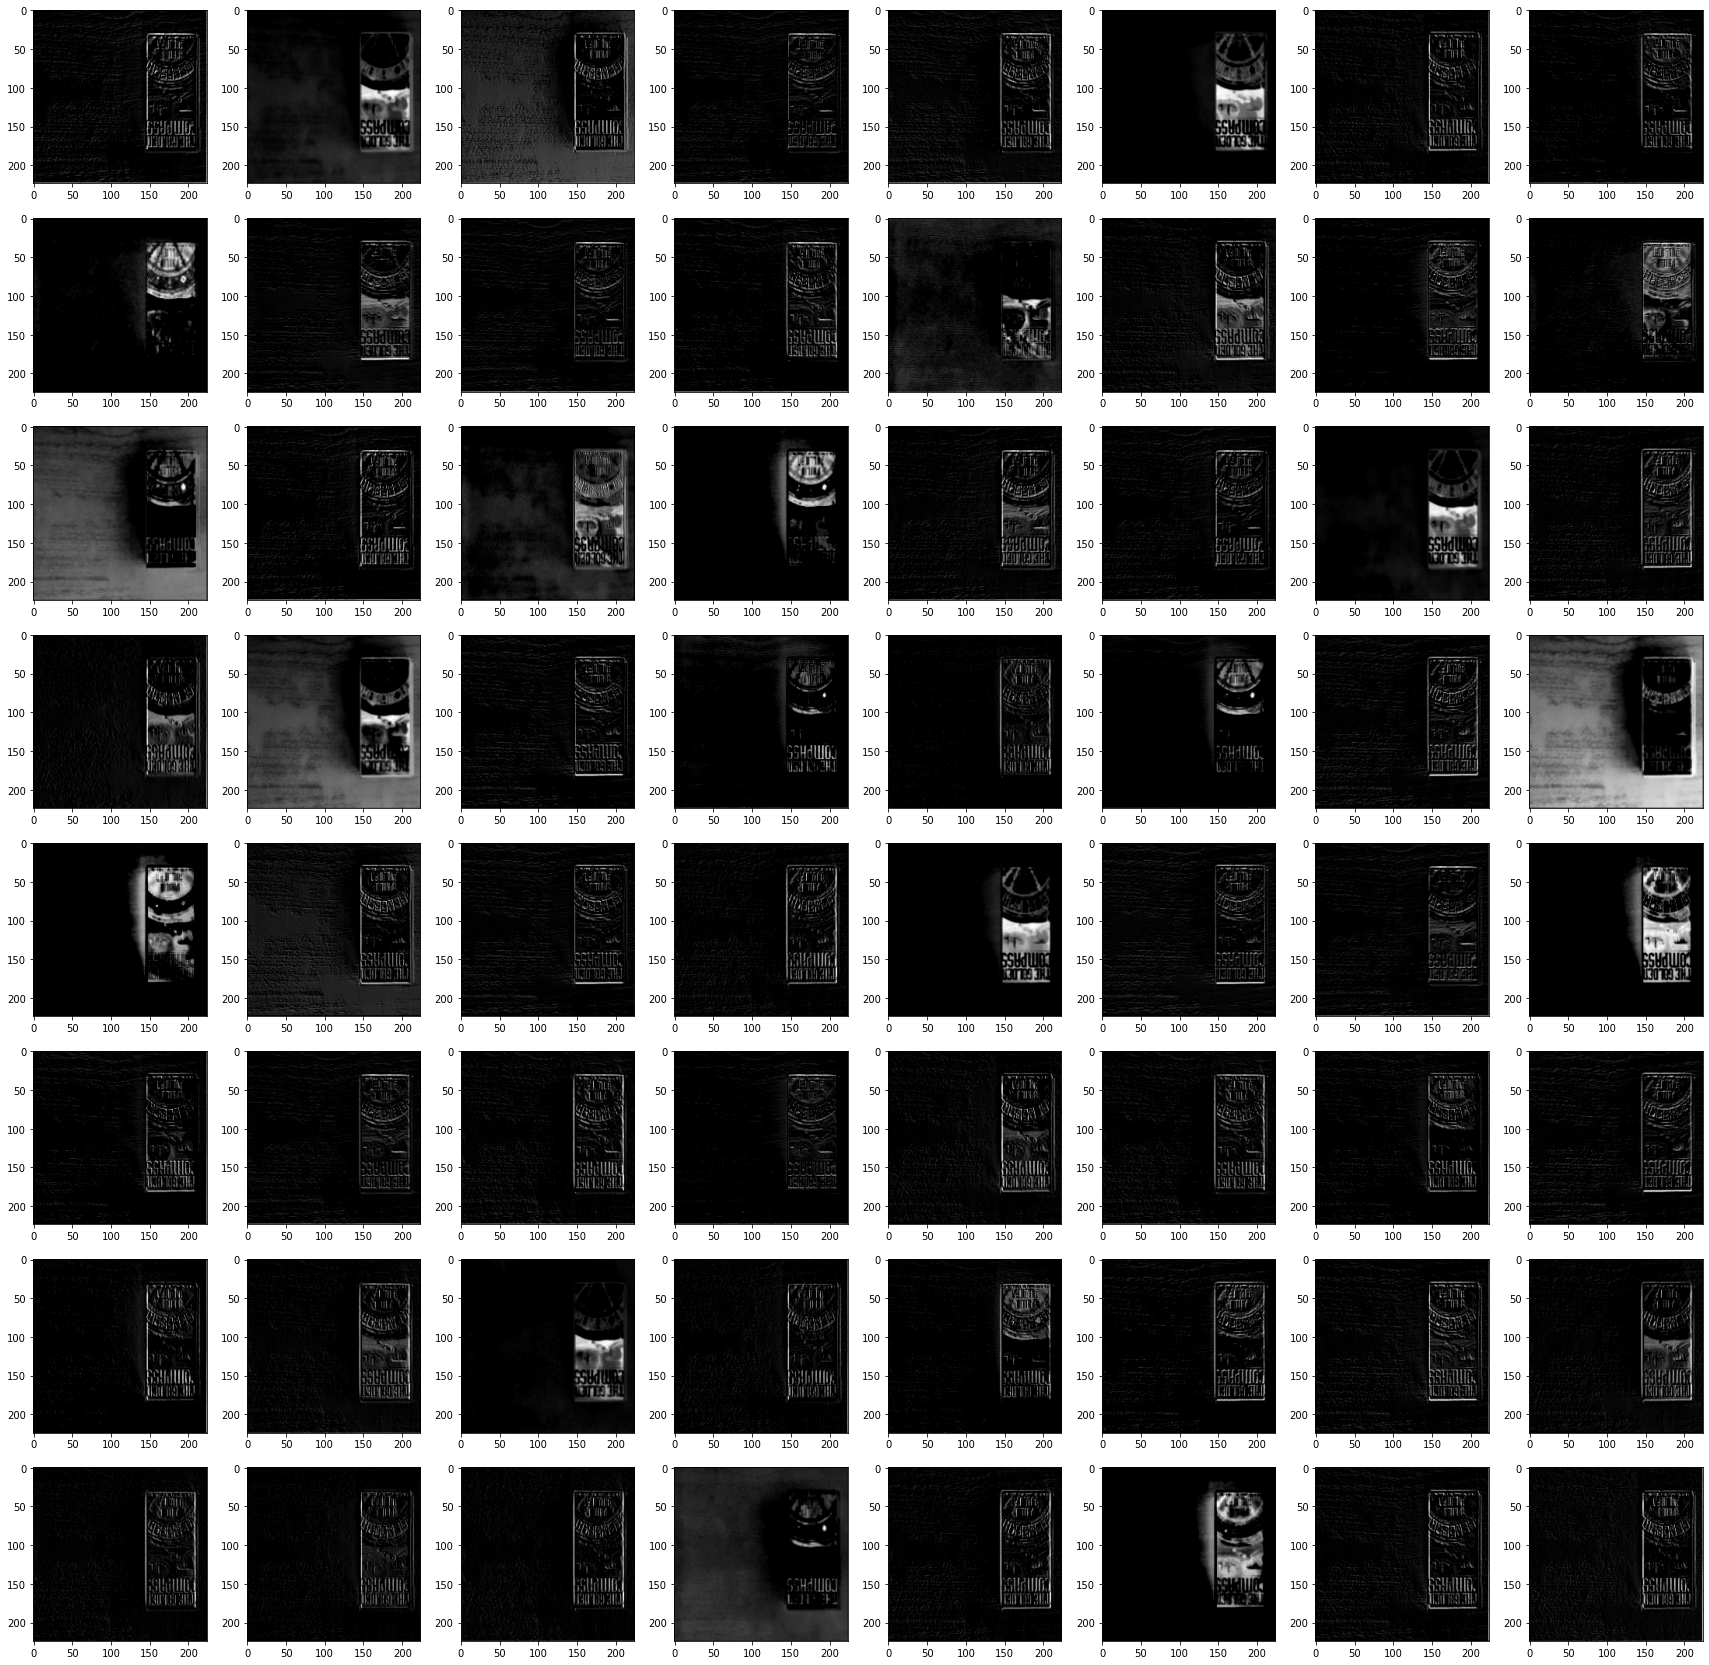

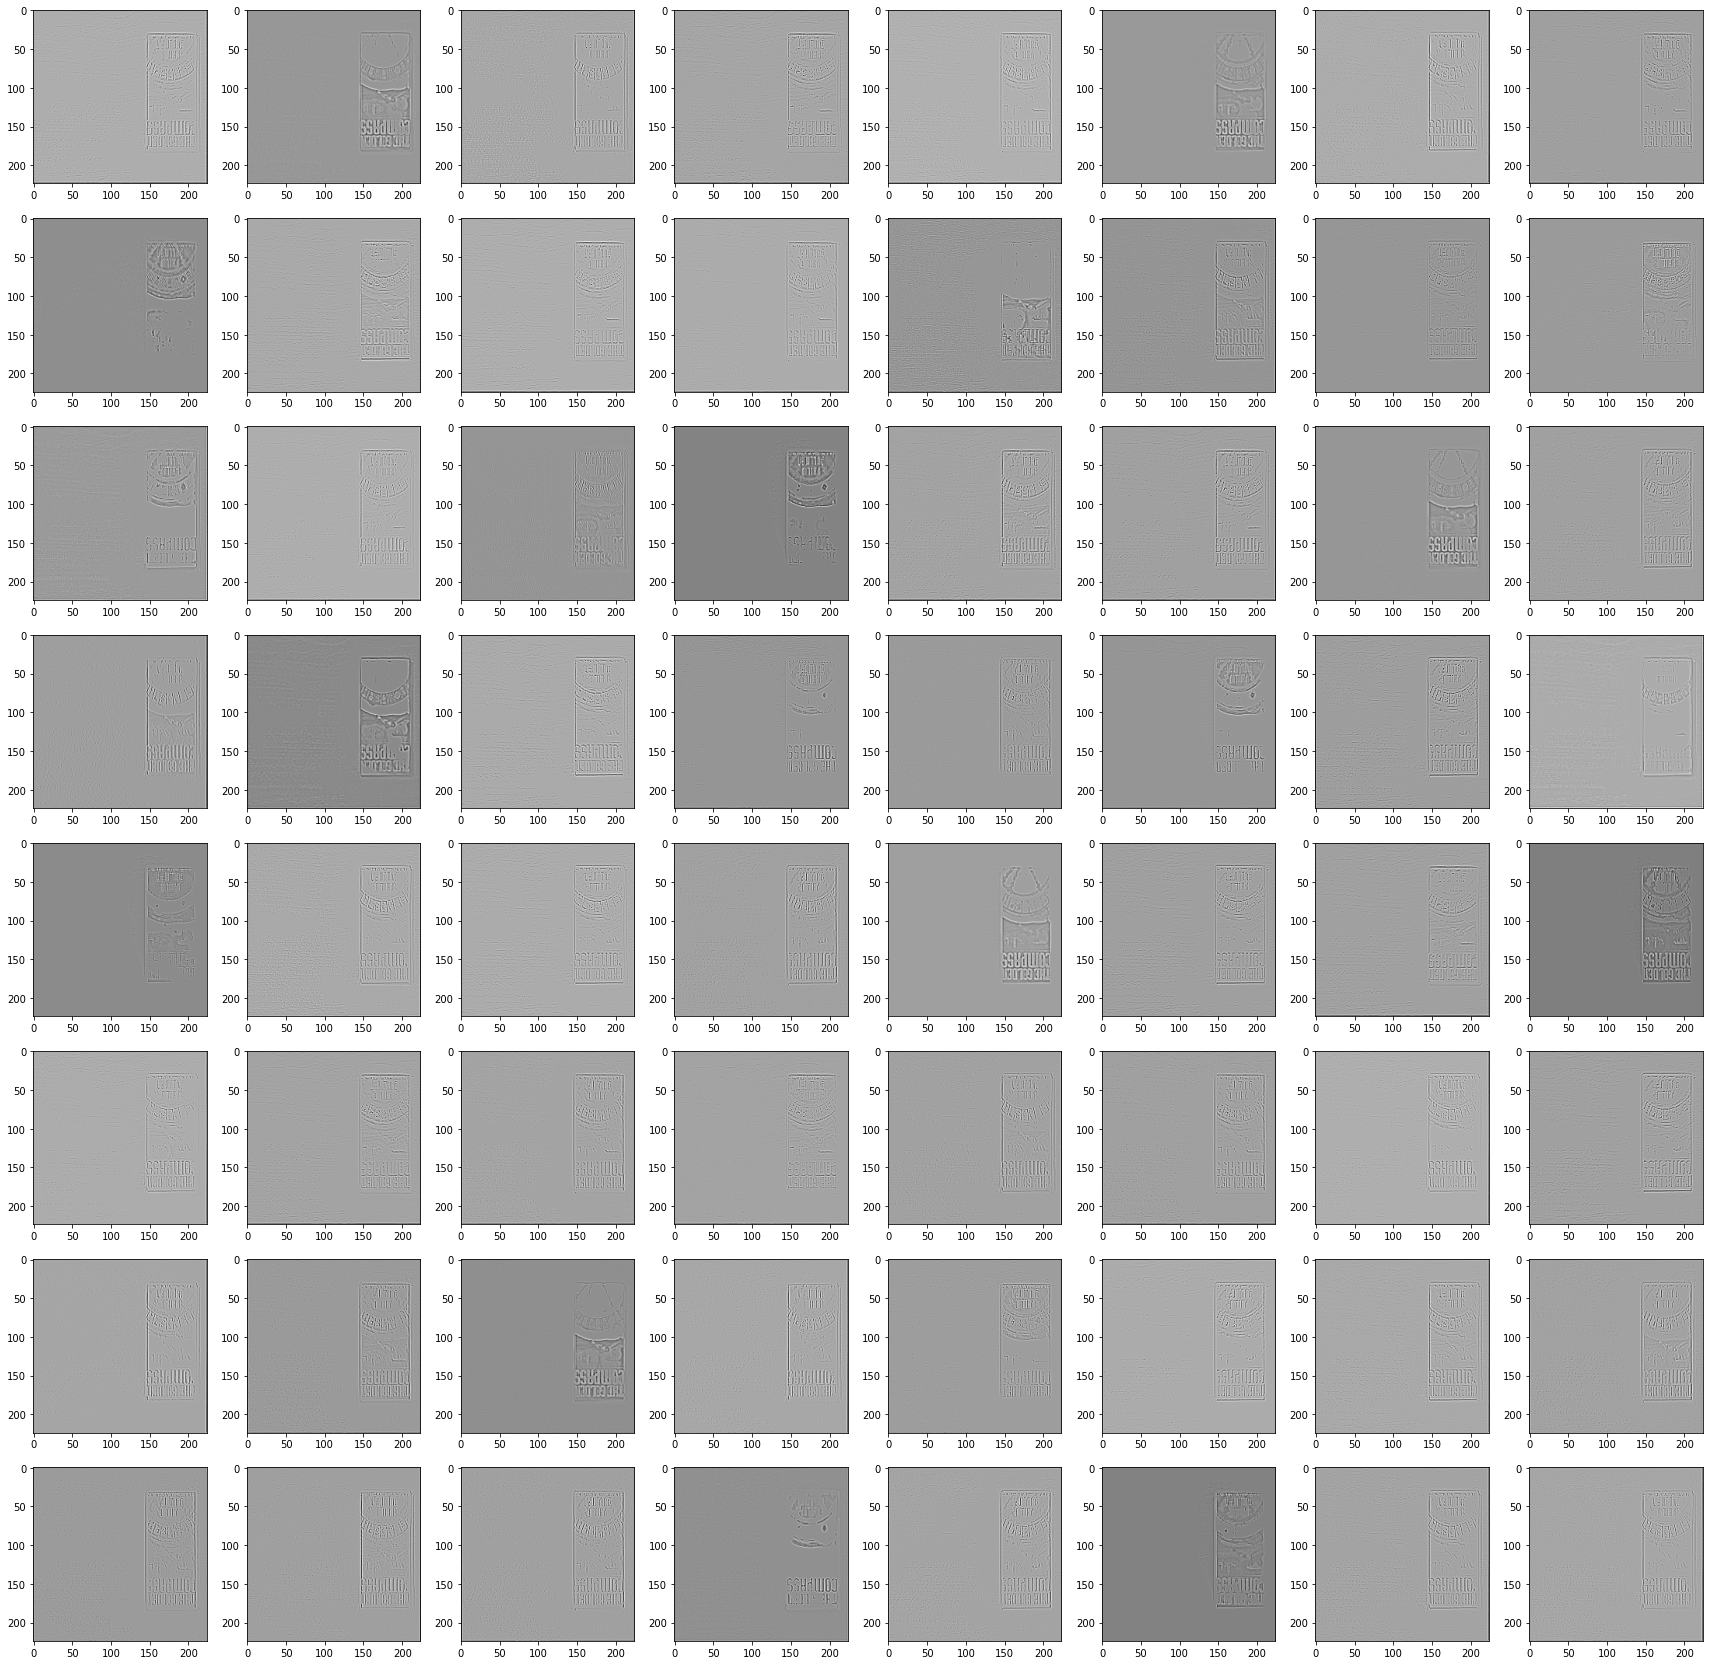

[[ 77 170]] 9089.578
[[   15.112934  -426.2153      12.089489 ... -3685.9202   -3593.7622
   -516.6499  ]
 [ -162.53871    530.6203      73.00058  ...  2439.6       2743.3962
  -3236.0547  ]
 [ -267.09277    112.74022    297.17804  ...   191.18814   1712.2108
  -3586.125   ]
 ...
 [-4001.6326    2210.398      -25.304007 ...   251.2829    3137.5728
  -6649.4624  ]
 [-3370.971     2991.393     1699.301    ...  2591.572     5973.418
  -7225.821   ]
 [  761.5346   -3193.574    -3419.1152   ... -5060.95     -4840.4463
    429.96802 ]]


"fig3 = plt.figure(figsize=(30, 30))\nfor i in range(1, columns*rows + 1):\n    out = laps[i-1]\n    #print(out.shape)\n    #plt.imshow(layer_out[0][:,:,2])\n    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)\n    dst = laplace(out)\n    #out = \n\n    fig3.add_subplot(rows, columns, i)\n    plt.imshow(dst, cmap=plt.get_cmap('gray'))\nplt.show()"

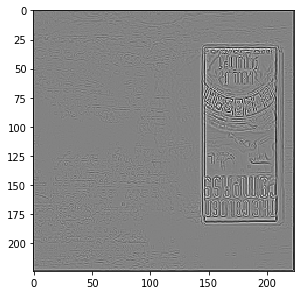

In [184]:
from scipy.ndimage import laplace

'''for i, layer in enumerate(model.layers):
    if 'conv' in layer.name:
        print(i)
        get_layer_output = K.function([model.input], layer.output)
        layer_out = np.array(get_layer_output(img))

        #plt.figure()
        plt.imshow(layer_out[0][:,:,1])'''

ddepth = cv2.CV_8U  
kernel_size = 3

fig = plt.figure(figsize=(30, 30))

columns = 8
rows = 8

imgs = []
get_layer_output = K.function([model.input], model.layers[1].output)
layer_out = np.array(get_layer_output(img))
for i in range(1, columns*rows + 1):
    #plt.imshow(layer_out[0][:,:,2])
    fig.add_subplot(rows, columns, i)
    imgs.append(layer_out[0][:,:,i-1])
    plt.imshow(imgs[-1], cmap=plt.get_cmap('gray'))
plt.show()

laps = []
fig2 = plt.figure(figsize=(30, 30))
for i in range(1, columns*rows + 1):
    out = imgs[i-1]
    #print(out.shape)
    #plt.imshow(layer_out[0][:,:,2])
    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)
    dst = cv2.Laplacian(out, cv2.CV_32F )
    laps.append(dst)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(laps[-1], cmap=plt.get_cmap('gray'))
plt.show()

fig3 = plt.figure()
#mag = np.linalg.norm(laps, axis = 0)
mag = np.sum(laps, axis = 0)
#mag /= mag.max()/255.0
plt.imshow(mag, cmap=plt.get_cmap('gray'), interpolation='nearest')


d_i = np.argwhere(mag == np.amax(mag)) 
print(d_i, np.amax(mag))
print(mag)

'''fig3 = plt.figure(figsize=(30, 30))
for i in range(1, columns*rows + 1):
    out = laps[i-1]
    #print(out.shape)
    #plt.imshow(layer_out[0][:,:,2])
    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)
    dst = laplace(out)
    #out = 

    fig3.add_subplot(rows, columns, i)
    plt.imshow(dst, cmap=plt.get_cmap('gray'))
plt.show()'''



In [185]:
def local_arg_exrtrema_2(mat1, mat2):

    #Use a moving window to find local max/min in section. Determine coordinate of max pixel in image.
    idx = []
    thresh = np.abs(np.amax(mat2) - np.abs(np.amin(mat2)))
    print("Thresh = ", thresh)
    for i in range(1, mat1.shape[0]-1):
        for j in range(1, mat1.shape[1]-1):
            pixel_of_interest = mat2[i,j]
            if np.abs(pixel_of_interest)>2000:

                neighbours = mat2[i-1:i+2, j-1:j+2]
                neighbours[1,1] = np.NaN
                neighbours_below = mat1[i-1:i+2, j-1:j+2]
                if (pixel_of_interest > np.nanmax(neighbours) and pixel_of_interest > np.nanmax(neighbours_below)) or (pixel_of_interest < np.nanmin(neighbours) and pixel_of_interest < np.nanmin(neighbours_below)):
                    idx.append(np.array([j,i]))

    return np.unique(idx, axis=0)

def local_arg_exrtrema_3(mat1, mat2, mat3):

    #Use a moving window to find local max/min in section. Determine coordinate of max pixel in image.
    idx = []

    for i in range(1, mat1.shape[0]-1):
        for j in range(1, mat1.shape[1]-1):
            pixel_of_interest = mat2[i,j]
            if np.abs(pixel_of_interest)>2000:
                print(pixel_of_interest)
                neighbours = mat2[i-1:i+2, j-1:j+2]
                neighbours[1,1] = np.NaN
                neighbours_above = mat3[i-1:i+2, j-1:j+2]
                neighbours_below = mat1[i-1:i+2, j-1:j+2]

                if (pixel_of_interest > np.nanmax(neighbours) and pixel_of_interest > np.nanmax(neighbours_above) and pixel_of_interest > np.nanmax(neighbours_below)) or (pixel_of_interest < np.nanmin(neighbours) and pixel_of_interest < np.nanmin(neighbours_above) and  pixel_of_interest < np.nanmin(neighbours_below)):
                    idx.append(np.array([i,j]))

    return idx #np.unique(idx, axis=0)




In [186]:
test_array = np.array([[ 90,  1,  2,  3,  4],
                       [ 7,  50,  9, 10, 11],
                       [14,  15,   np.NaN, 600, 18],
                       [21, 22, 23, 1, 25],
                       [28, 29, 30, 31, 6]])

#local_argmax(mag)
np.nanmax(test_array)

600.0

In [187]:
model.layers[1].name


'block1_conv1'

In [188]:
# A function that does the above step but for any all layers in a block
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def cnn_lap(image, layer_name):
    layers = [l for l in model.layers if layer_name == l.name]
    #print(layers)
    mag = []
    for layer in layers:
        if type(layer.output_shape) is list:
            num_channels = layer.output_shape[0][-1]
        else:
            num_channels = layer.output_shape[-1]
        #print(num_channels)

        imgs = []
        get_layer_output = K.function([model.input], layer.output)
        layer_out = np.array(get_layer_output(image))
        for i in range(0, num_channels):
            #plt.imshow(layer_out[0][:,:,2])
            imgs.append(layer_out[0][:,:,i])

        laps = []
        for i in range(0, num_channels):
            out = imgs[i]
            dst = cv2.Laplacian(out, cv2.CV_32F )
            laps.append(dst)

        #mag.append(np.linalg.norm(np.abs(laps), axis = 0))
        mag.append(np.sum(laps, axis = 0))
        #scaled_mag = min_max_scaler.fit_transform(mag[0])

        #mag /= mag.max()/255.0'''
    return mag[0]
    #return dst

In [189]:
model.layers[1].output_shape[-1]

64

"mag_input = cnn_lap(img, block=2)\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3)\n\nax1.imshow(mag[0], cmap=plt.get_cmap('gray'))\nax2.imshow(mag[1], cmap=plt.get_cmap('gray'))\nax3.imshow(np.abs(mag[1]-mag[0]), cmap=plt.get_cmap('gray'))"

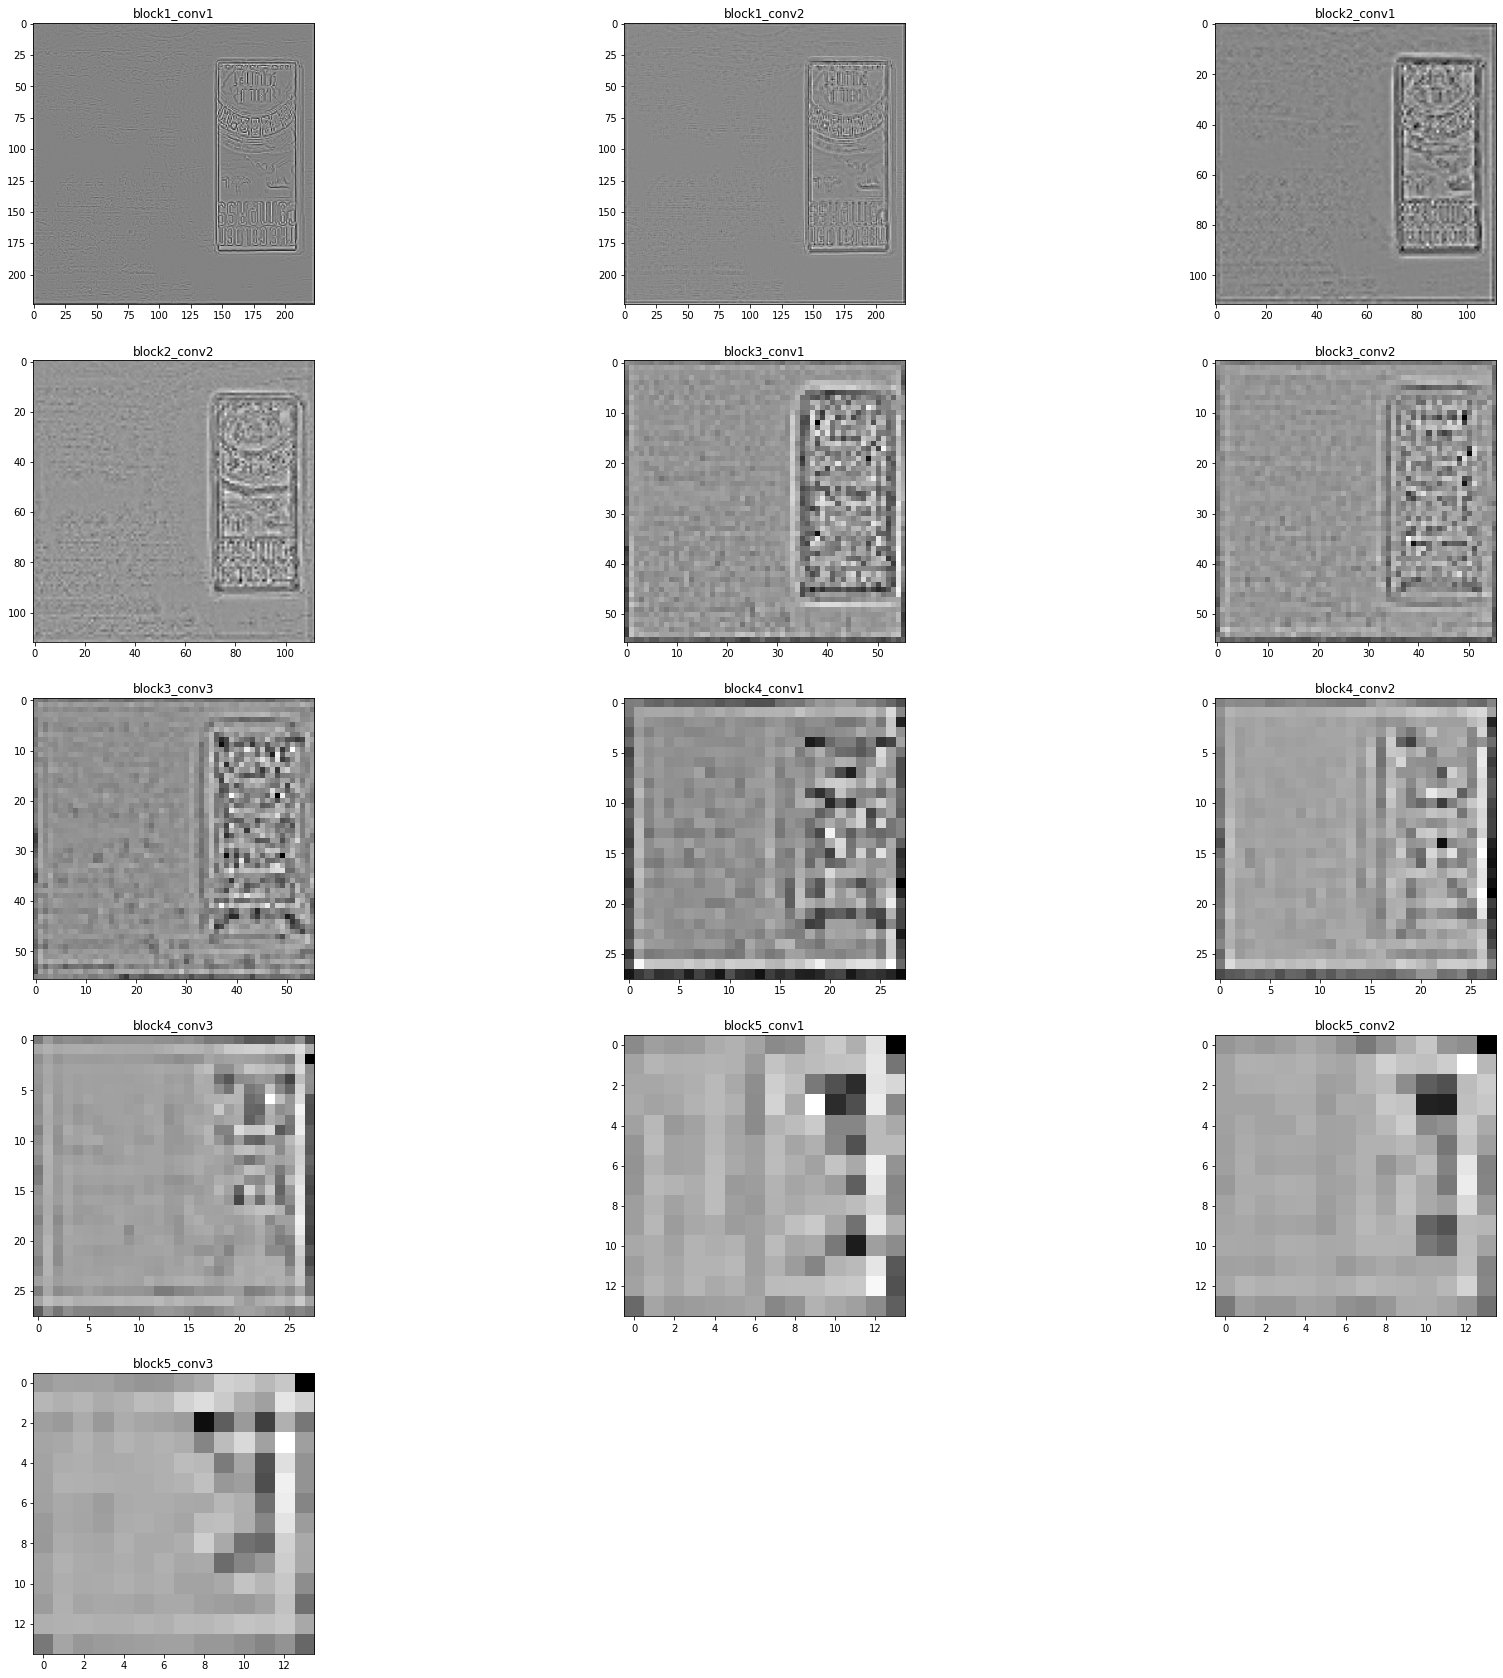

In [190]:
layers = [l.name for l in model.layers if ('conv' in l.name)]

#plt.subplots(len(layers)/3, 3)

fig = plt.figure(figsize=(30, 30))
for i, layer in enumerate(layers):
    fig.add_subplot(int(np.ceil(len(layers)/3)), 3, i+1)
    mag = cnn_lap(img, layer_name=layer)
    plt.imshow(mag, cmap=plt.get_cmap('gray'))
    plt.title(layer)

'''mag_input = cnn_lap(img, block=2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(mag[0], cmap=plt.get_cmap('gray'))
ax2.imshow(mag[1], cmap=plt.get_cmap('gray'))
ax3.imshow(np.abs(mag[1]-mag[0]), cmap=plt.get_cmap('gray'))'''

#ax3.imshow(mag[2], cmap=plt.get_cmap('gray'))



In [191]:
mag.shape

(14, 14)

In [192]:
keypoint_coords = []

layers = [l.name for l in model.layers if ('conv' in l.name)]
for block in range(1,5):
    layers = [l.name for l in model.layers if 'block'+str(block)+'_conv' in l.name]
    if len(layers) == 2:
        #do argmax for 2 images
        mag_1 = cnn_lap(img, layer_name=layers[0])
        mag_2 = cnn_lap(img, layer_name=layers[1])
        if mag_1.shape != (224, 224):
            mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
        coords = local_arg_exrtrema_2(mag_1, mag_2)


    if len(layers) == 3:
        #do argmax for 3 images
        mag_1 = cnn_lap(img, layer_name=layers[0])
        mag_2 = cnn_lap(img, layer_name=layers[1])
        mag_3 = cnn_lap(img, layer_name=layers[2])
        if mag_1.shape != (224, 224):
            mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_3 = cv2.resize(mag_3, (224, 224), interpolation = cv2.INTER_LINEAR )
        coords = local_arg_exrtrema_3(mag_1, mag_2, mag_3)

    keypoint_coords.extend( coords) # np.concatenate((keypoint_coords, coords))
keypoint_coords = np.unique(keypoint_coords, axis=0)

Thresh =  2556.3887
Thresh =  6382.926
8745.014
6166.212
-4148.995
-9306.599
-12678.991
-14266.172
-15853.353
-17440.533
-19079.76
-20771.035
-22462.31
-24153.586
-25358.375
-26076.678
-26794.982
-27513.285
-28710.996
-30388.11
-32065.227
-33742.34
-34030.176
-32928.727
-31827.281
-30725.834
-29758.838
-28926.291
-28093.746
-27261.2
-25494.365
-22793.244
-20092.123
-17391.002
-17137.63
-19332.01
-21526.387
-23720.766
-24936.484
-25173.545
-25410.605
-25647.666
-25715.947
-25615.453
-25514.957
-25414.463
-25671.041
-26284.695
-26898.35
-27512.004
-27592.812
-27140.78
-26688.744
-26236.71
-25708.041
-25102.738
-24497.436
-23892.133
-24233.287
-25520.898
-26808.51
-28096.121
-29144.098
-29952.436
-30760.773
-31569.111
-31064.83
-29247.928
-27431.025
-25614.123
-25413.875
-26830.283
-28246.69
-29663.098
-30428.035
-30541.502
-30654.97
-30768.438
-30600.941
-30152.479
-29704.018
-29255.555
-30057.807
-32110.773
-34163.74
-36216.703
-36698.25
-35608.37
-34518.492
-33428.613
-33047.664
-33375

Thresh =  448.18555


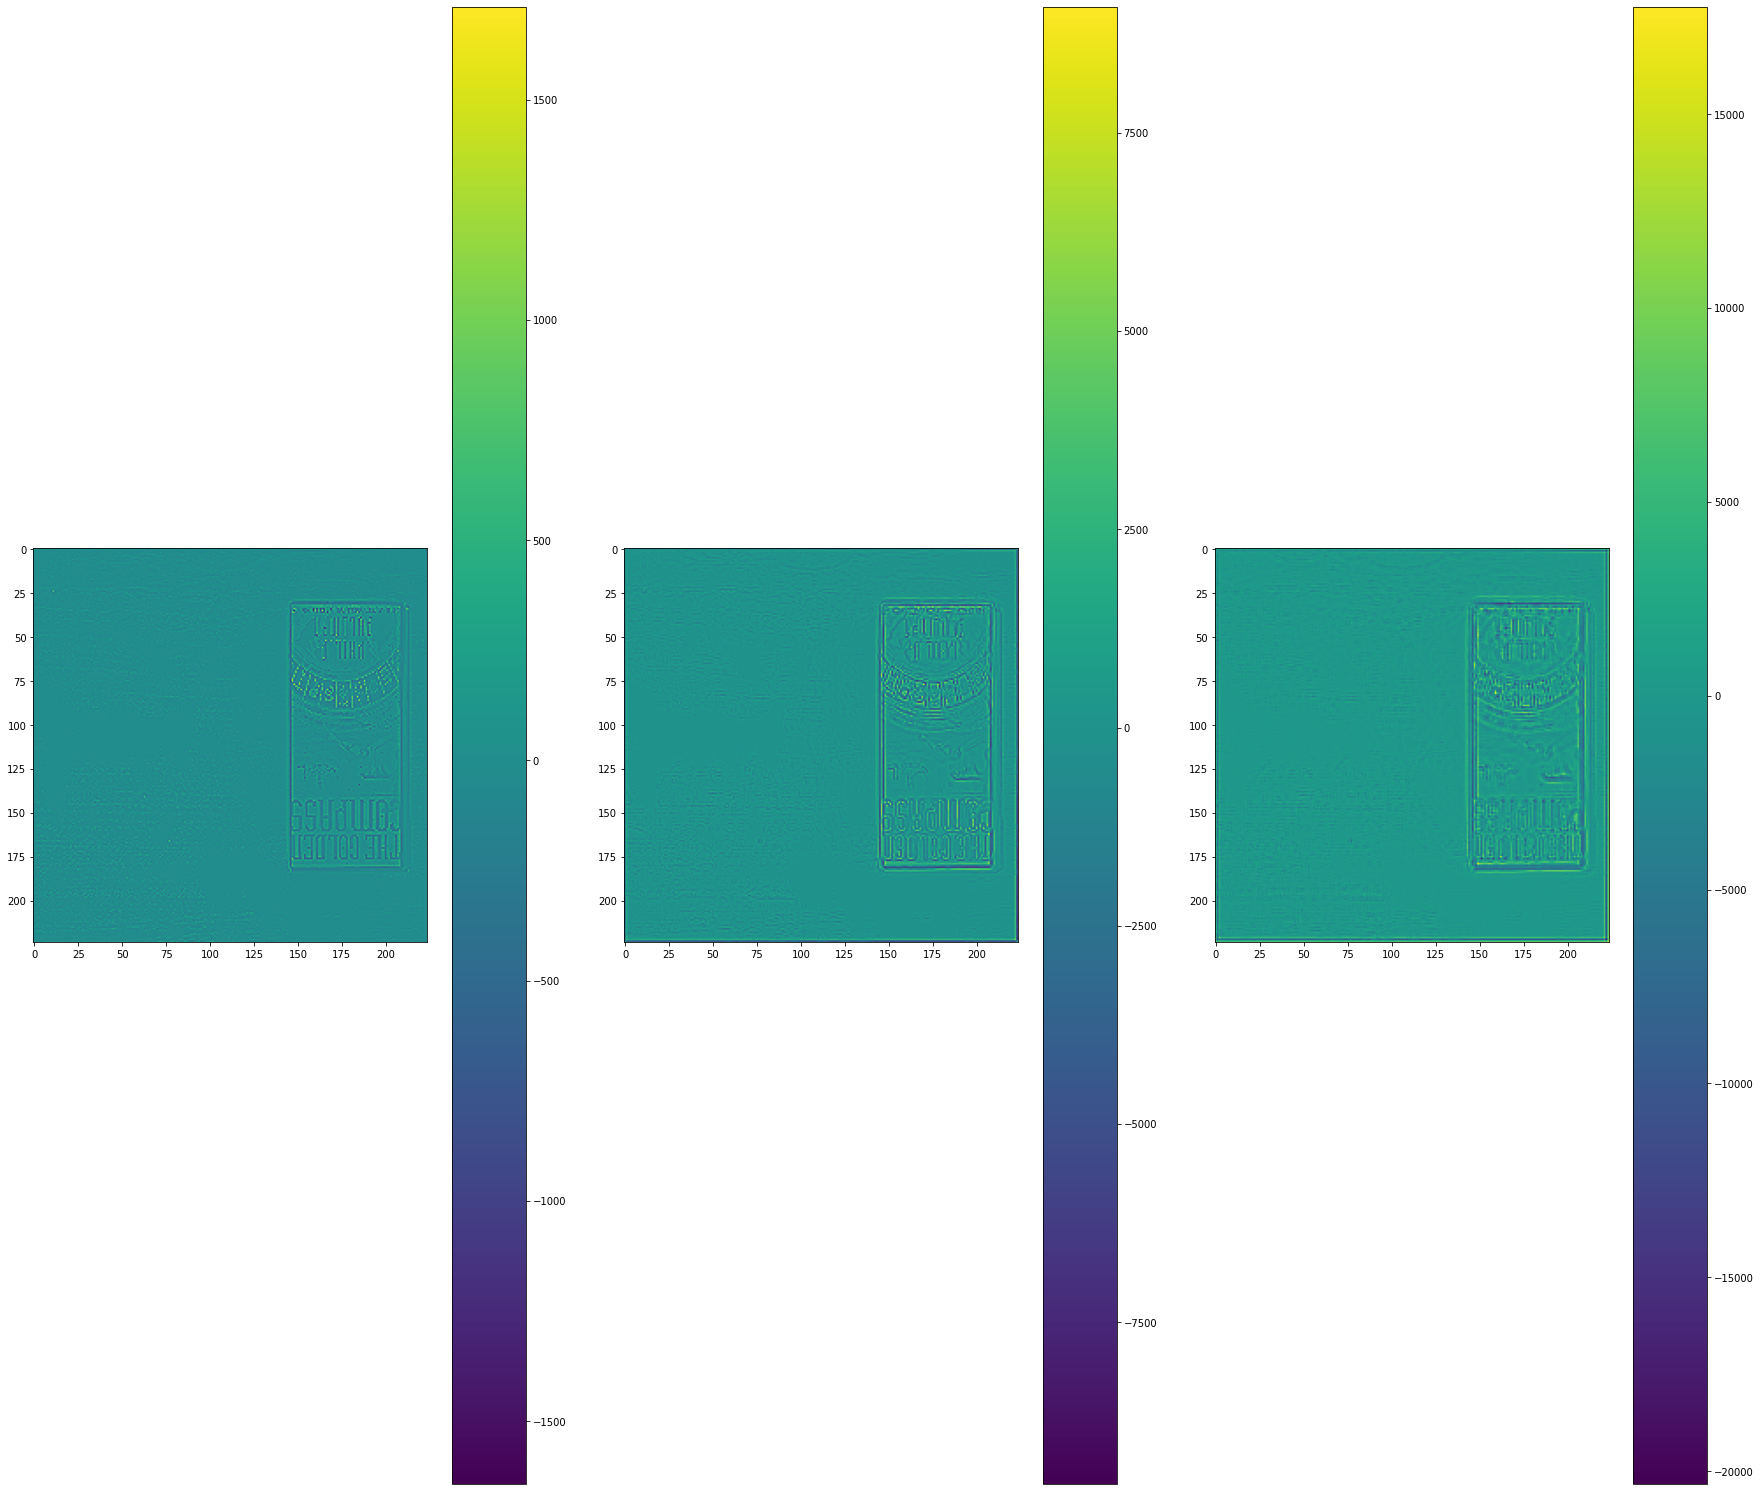

In [193]:
keypoint_coords = []

#do argmax for 3 images
#layers = copy() #[l.name for l in model.layers if ('conv' in l.name)]

mag_1 = cnn_lap(img, layer_name=model.layers[0].name)
mag_2 = cnn_lap(img, layer_name=model.layers[1].name)
mag_3 = cnn_lap(img, layer_name=model.layers[2].name)
fig = plt.figure(figsize=(30, 30))

plt.subplot(1,3,1)
plt.imshow(mag_1)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(mag_2)
plt.colorbar()


plt.subplot(1,3,3)
plt.imshow(mag_3)
plt.colorbar()
mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
mag_3 = cv2.resize(mag_3, (224, 224), interpolation = cv2.INTER_LINEAR )
keypoint_coords = np.unique(local_arg_exrtrema_2(mag_1, mag_2 ), axis=0)

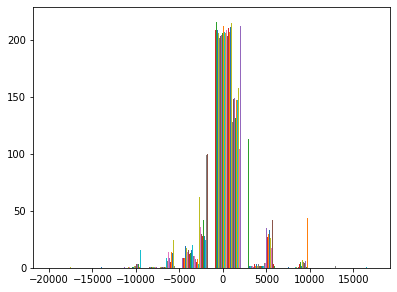

In [194]:
plt.hist(mag_3)
plt.show() 

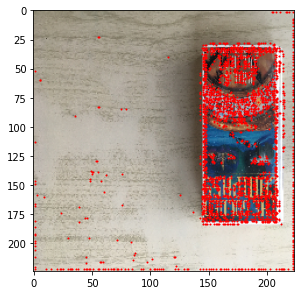

In [198]:
i = image.load_img('./SYS809_projet2021_sequences1/livre1.JPG' , target_size=(224, 224))    

##
#plt.gca().invert_yaxis()
plt.figure()
plt.imshow(i)
plt.scatter(5,60, s=[2], c='r')
plt.scatter(list(list(zip(*keypoint_coords))[0]), list(list(zip(*keypoint_coords))[1]), s=[1], c='r')
plt.show()


In [196]:
keypoint_coords

array([[  1,  52],
       [  1, 113],
       [  1, 146],
       ...,
       [222, 218],
       [222, 220],
       [222, 222]])

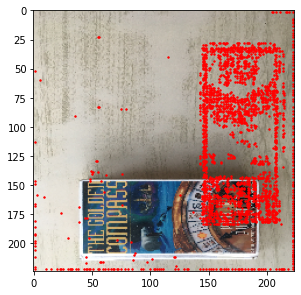

In [197]:
i = image.load_img('./SYS809_projet2021_sequences1/new_livre1.JPG' , target_size=(224, 224))    

##
#plt.gca().invert_yaxis()
plt.figure()
plt.imshow(i)
plt.scatter(5,60, s=[2], c='r')
plt.scatter(list(list(zip(*keypoint_coords))[0]), list(list(zip(*keypoint_coords))[1]), s=[2], c='r')
plt.show()
